do correlation analysis in kreise and connect ones that have corr>0.8

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [1]:
cd ..

/Users/cinny/GitHub/Map-Tool


In [3]:
df = pd.read_csv('data/arbeitsmarktentwicklung.csv')

In [4]:
df.shape

(401, 228)

In [5]:
df.head(1)

,_id,ags2,bundesland,ags5,kreis,kr_ka_au_202001,kr_ka_au_202002,kr_ka_au_202003,kr_ka_au_202004,kr_ka_au_202005,...,kr_rlb_202007,kr_rlb_202008,kr_rlb_202009,kr_rlb_202010,kr_rlb_202011,kr_rlb_202012,kr_rlb_202101,kr_rlb_202102,kr_rlb_202103,kr_rlb_202104
0,1,1,Schleswig-Holstein,1001,"Flensburg, Stadt",0,0,185,758,70,...,11528,11401,11211,11018,10941,10988,11066,11165.08275,11193.617211,11111.999397


In [104]:
#list(df.columns)

In [25]:
# fix ags5 code to be len=5, add 0 at front
def fix_ags5(x):
    if len(str(x))==4:
        return '0'+str(x)
    else:
        return str(x)
df['ags5'] = df['ags5'].apply(fix_ags5)

In [26]:
# df_202009 = df[['_id', 'ags2', 'bundesland', 'ags5', 'kreis',
#                 'kr_ka_au_202009', 'kr_ka_ap_202009', 'kr_ka_ru_202009', 
#                 'kr_ka_rp_202009', 'kr_al_202009', 'kr_alq_202009', 
#                 'kr_svb_wo_202009', 'kr_ub_202009', 'kr_alga_202009', 
#                 'kr_ga_202009', 'kr_rlb_202009']]

In [28]:
# df_202009_corr = df_202009.set_index('ags5')[[
#                 'kr_ka_au_202009', 'kr_ka_ap_202009', 'kr_ka_ru_202009', 
#                 'kr_ka_rp_202009', 'kr_al_202009', 'kr_alq_202009', 
#                 'kr_svb_wo_202009', 'kr_ub_202009', 'kr_alga_202009', 
#                 'kr_ga_202009', 'kr_rlb_202009']]

In [200]:
filter_col = [col for col in df if col.startswith('kr_alq_')]
#filter_col

In [204]:
'kr_ka_au_202001'[:-7]

'kr_ka_au'

In [201]:
df_kr_alq = df[['_id', 'ags2', 'bundesland', 'ags5', 'kreis'] + filter_col]

In [108]:
df_kr_alq_corr = df_kr_alq.set_index('ags5')[filter_col]

In [110]:
#df_kr_alq_corr.transpose()

In [96]:
# df_202009_corr.transpose().corr()

In [112]:
df_kr_alq_corr.transpose().corr()

ags5,01001,01002,01003,01004,01051,01053,01054,01055,01056,01057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
ags5,,,,,,,,,,,,,,,,,,,,,
01001,1.000000,0.895971,0.869306,0.857821,0.688320,0.916818,0.390461,0.384950,0.872014,0.854145,...,0.897264,0.802101,0.859229,0.857468,0.893061,0.742200,0.680475,0.450199,0.788869,0.181870
01002,0.895971,1.000000,0.941950,0.951443,0.675241,0.959015,0.362935,0.367374,0.959426,0.909284,...,0.930909,0.793176,0.895041,0.892008,0.907956,0.835756,0.748361,0.594005,0.791571,0.336349
01003,0.869306,0.941950,1.000000,0.974657,0.812141,0.954465,0.539002,0.531521,0.959130,0.895373,...,0.929705,0.871933,0.919933,0.923946,0.929235,0.934319,0.853749,0.703218,0.826093,0.388743
01004,0.857821,0.951443,0.974657,1.000000,0.769886,0.970232,0.498894,0.505034,0.990470,0.904970,...,0.939557,0.896830,0.890014,0.925019,0.962851,0.900445,0.823090,0.647421,0.814727,0.292500
01051,0.688320,0.675241,0.812141,0.769886,1.000000,0.780922,0.911184,0.908203,0.763807,0.853953,...,0.856000,0.896097,0.887001,0.905616,0.795807,0.927125,0.960186,0.871511,0.927166,0.585637
01053,0.916818,0.959015,0.954465,0.970232,0.780922,1.000000,0.508367,0.512201,0.983248,0.940682,...,0.968850,0.891276,0.928989,0.938249,0.961462,0.870648,0.809444,0.608189,0.858061,0.280444
01054,0.390461,0.362935,0.539002,0.498894,0.911184,0.508367,1.000000,0.994043,0.493366,0.647722,...,0.621651,0.730582,0.685006,0.706133,0.541864,0.748773,0.841639,0.824063,0.794012,0.613923
01055,0.384950,0.367374,0.531521,0.505034,0.908203,0.512201,0.994043,1.000000,0.505275,0.657774,...,0.625516,0.743375,0.671641,0.708714,0.555044,0.741378,0.840043,0.820981,0.795024,0.593967
01056,0.872014,0.959426,0.959130,0.990470,0.763807,0.983248,0.493366,0.505275,1.000000,0.925346,...,0.951748,0.893373,0.892054,0.925333,0.966782,0.882100,0.805331,0.626960,0.825419,0.281350


In [172]:
(sum((df_kr_alq_corr.transpose().corr()>0.99).sum())-401)//2

212

In [236]:
df_kr_alq_corr.transpose().corr().iloc[0].iloc[0]

1.0

In [173]:
kreise1 = []
kreise2 = []
source = []
target = []
value = []
size = list(df['kr_ka_au_202104'])

for col in range(400):
    for row in range(col,400):
        ratio = df_kr_alq_corr.transpose().corr().iloc[col][row]
        # logging
        if (col in list(range(0,401,10))) and (row in list(range(0,401,10))) and (col==row):
            print(f'{col} rows processed ...')
        # high correlation
        if (ratio>0.99) and (ratio<1):
            ags5 = df_kr_alq_corr.transpose().corr().index
            kreise1.append(ags5[col])
            kreise2.append(ags5[row])
            source.append(col)
            target.append(row)
            value.append(ratio)

0 rows processed ...
10 rows processed ...
20 rows processed ...
30 rows processed ...
40 rows processed ...
50 rows processed ...
60 rows processed ...
70 rows processed ...
80 rows processed ...
90 rows processed ...
100 rows processed ...
110 rows processed ...
120 rows processed ...
130 rows processed ...
140 rows processed ...
150 rows processed ...
160 rows processed ...
170 rows processed ...
180 rows processed ...
190 rows processed ...
200 rows processed ...
210 rows processed ...
220 rows processed ...
230 rows processed ...
240 rows processed ...
250 rows processed ...
260 rows processed ...
270 rows processed ...
280 rows processed ...
290 rows processed ...
300 rows processed ...
310 rows processed ...
320 rows processed ...
330 rows processed ...
340 rows processed ...
350 rows processed ...
360 rows processed ...
370 rows processed ...
380 rows processed ...
390 rows processed ...


In [174]:
match = pd.DataFrame({'kreise1': kreise1, 'kreise2': kreise2,
                      'source': source, 'target': target,
                      'value': value})

In [175]:
match['group'] = match['kreise1'].astype(str).str[:2]
# match['bd1'] = match['kreise1'].str[:2]
# match['bd2'] = match['kreise2'].str[:2]

In [176]:
match.shape

(212, 6)

In [239]:
#match['kreise1'].astype(str).str[:2]

In [177]:
linksdf = match[['source', 'target', 'value', 'group']]
#links = linksdf.to_dict('index')
links = linksdf.T.to_dict().values()
links = str(links)[12:-1].replace("'", '"')

In [178]:
nodesdf = df[['ags5', 'ags2', 'kr_ka_au_202009']]
nodesdf.columns = ['name', 'group', 'size']
nodes = nodesdf.T.to_dict().values()
nodes = str(nodes)[12:-1].replace("'", '"')

In [179]:
network = '{"nodes": ' + nodes + ', "links": ' + links + '}'

In [180]:
with open('network.txt', 'w') as writer:
    writer.write(network)

In [134]:
# {"nodes": [
#     {"name": "Azza Abouzied", "group": 3, "size": 21.0}, {"name": "Maeda F", "group": 3, "size": 2.26}, 
#     {"name": "Hanafi", "group": 3, "size": 0.24}, {"name": "Miro Mannino", "group": 3, "size": 0.36}], 
#  "links": [
#      {"source": 0, "target": 3, "value": 3, "group": 1}, {"source": 4, "target": 5, "value": 3, "group": 1}, 
#      {"source": 4, "target": 6, "value": 3, "group": 1}, {"source": 5, "target": 4, "value": 3, "group": 1}]}

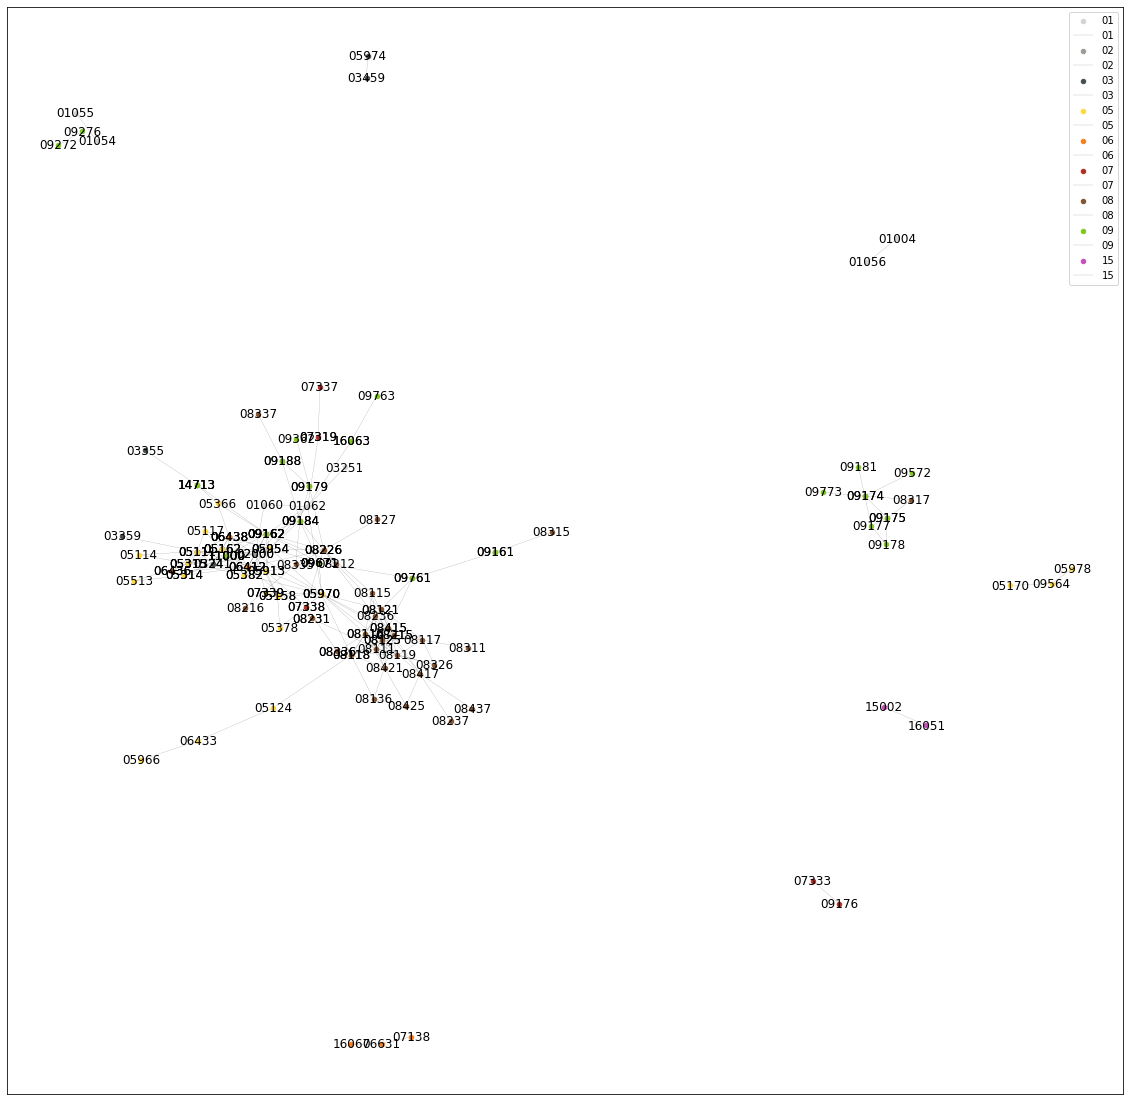

In [241]:
plt.figure(figsize=(20,20))

G01 = nx.from_pandas_edgelist(match[match['group']=='01'], source='kreise1', target='kreise2')
G02 = nx.from_pandas_edgelist(match[match['group']=='02'], source='kreise1', target='kreise2')
G03 = nx.from_pandas_edgelist(match[match['group']=='03'], source='kreise1', target='kreise2')
G04 = nx.from_pandas_edgelist(match[match['group']=='04'], source='kreise1', target='kreise2')
G05 = nx.from_pandas_edgelist(match[match['group']=='05'], source='kreise1', target='kreise2')
G06 = nx.from_pandas_edgelist(match[match['group']=='06'], source='kreise1', target='kreise2')
G07 = nx.from_pandas_edgelist(match[match['group']=='07'], source='kreise1', target='kreise2')
G08 = nx.from_pandas_edgelist(match[match['group']=='08'], source='kreise1', target='kreise2')
G09 = nx.from_pandas_edgelist(match[match['group']=='09'], source='kreise1', target='kreise2')
G10 = nx.from_pandas_edgelist(match[match['group']=='10'], source='kreise1', target='kreise2')
G11 = nx.from_pandas_edgelist(match[match['group']=='11'], source='kreise1', target='kreise2')
G12 = nx.from_pandas_edgelist(match[match['group']=='12'], source='kreise1', target='kreise2')
G13 = nx.from_pandas_edgelist(match[match['group']=='13'], source='kreise1', target='kreise2')
G14 = nx.from_pandas_edgelist(match[match['group']=='14'], source='kreise1', target='kreise2')
G15 = nx.from_pandas_edgelist(match[match['group']=='15'], source='kreise1', target='kreise2')
G16 = nx.from_pandas_edgelist(match[match['group']=='16'], source='kreise1', target='kreise2')

Gmatch = nx.from_pandas_edgelist(match, source='kreise1', target='kreise2')
pos = nx.spring_layout(Gmatch)
options = {'node_size':20, 'alpha':1, 'width':0.1}

nx.draw_networkx(G01, pos, with_labels=True, node_color="#d3d3d3", label='01', **options)
nx.draw_networkx(G02, pos, with_labels=True, node_color="#9c9d97", label='02', **options)
nx.draw_networkx(G03, pos, with_labels=True, node_color="#474f52", label='03', **options)
nx.draw_networkx(G04, pos, with_labels=True, node_color="#1d1c21", label='04', **options)
nx.draw_networkx(G05, pos, with_labels=True, node_color="#ffd83d", label='05', **options)
nx.draw_networkx(G06, pos, with_labels=True, node_color="#f9801d", label='06', **options)
nx.draw_networkx(G07, pos, with_labels=True, node_color="#b02e26", label='07', **options)
nx.draw_networkx(G08, pos, with_labels=True, node_color="#825432", label='08', **options)
nx.draw_networkx(G09, pos, with_labels=True, node_color="#80c71f", label='09', **options)
nx.draw_networkx(G10, pos, with_labels=True, node_color="#5d7c15", label='10', **options)
nx.draw_networkx(G11, pos, with_labels=True, node_color="#3ab3da", label='11', **options)
nx.draw_networkx(G12, pos, with_labels=True, node_color="#169c9d", label='12', **options)
nx.draw_networkx(G13, pos, with_labels=True, node_color="#3c44a9", label='13', **options)
nx.draw_networkx(G14, pos, with_labels=True, node_color="#f38caa", label='14', **options)
nx.draw_networkx(G15, pos, with_labels=True, node_color="#c64fbd", label='15', **options)
nx.draw_networkx(G16, pos, with_labels=True, node_color="#8932b7", label='16', **options)

plt.legend()
plt.show()

In [196]:
[len(c) for c in sorted(nx.connected_components(Gmatch), key=len, reverse=True)]

[71, 8, 3, 3, 2, 2, 2, 2, 2, 2]

In [248]:
clusters = [c for c in sorted(nx.connected_components(Gmatch), key=len, reverse=True)]

In [250]:
#clusters[0]

In [267]:
for c in clusters:
    c = list(c)
    c = [str(i) for i in c]
    counties = df[df['ags5'].isin(c)]
    print(list(counties['kreis']))

['Segeberg', 'Stormarn', 'Hamburg', 'Hannover', 'Diepholz', 'Lüneburg', 'Stade', 'Düsseldorf', 'Krefeld', 'Mülheim an der Ruhr', 'Wuppertal', 'Mettmann', 'Rhein-Kreis Neuss', 'Bonn', 'Köln', 'Euskirchen', 'Rheinisch-Bergischer Kreis', 'Rhein-Sieg-Kreis', 'Gelsenkirchen', 'Dortmund', 'Ennepe-Ruhr-Kreis', 'Olpe', 'Siegen-Wittgenstein', 'Kreisfreie Stadt Frankfurt am Main', 'Groß-Gerau', 'Main-Taunus', 'Offenbach', 'Stadt Worms', 'Südliche Weinstraße', 'Rhein-Pfalz-Kreis', 'Mainz-Bingen', 'Stuttgart', 'Böblingen', 'Esslingen', 'Göppingen', 'Ludwigsburg', 'Rems-Murr-Kreis', 'Heilbronn, Stadt', 'Heilbronn, Kreis', 'Schwäbisch Hall', 'Ostalbkreis', 'Karlsruhe, Stadt', 'Karlsruhe, Kreis', 'Rastatt', 'Rhein-Neckar-Kreis', 'Pforzheim', 'Enzkreis', 'Freudenstadt', 'Freiburg im Breisgau', 'Breisgau-Hochschwarzwald', 'Schwarzwald-Baar-Kreis', 'Konstanz', 'Lörrach', 'Waldshut', 'Reutlingen', 'Zollernalbkreis', 'Ulm', 'Alb-Donau-Kreis', 'Sigmaringen', 'Ingolstadt', 'München, Landeshauptstadt', 'Fürs